In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
df = pd.read_csv('cancer_classification.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [10]:
class Model(nn.Module):
    def __init__(self,input_sz, h1, h2, h3, out_sz):
        super().__init__()
        self.fc1 = nn.Linear(input_sz, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.out = nn.Linear(h3, out_sz)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)
        
        return x

In [11]:
X.shape

(569, 30)

In [12]:
torch.manual_seed(32)
my_model = Model(input_sz=30, h1=60, h2=20, h3=10 ,out_sz=2)

In [13]:
my_model

Model(
  (fc1): Linear(in_features=30, out_features=60, bias=True)
  (fc2): Linear(in_features=60, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_model.parameters(), lr = 0.001)

In [15]:
import time 
start_time = time.time()
epochs = 300
losses = []

for i in range(epochs):
    y_pred = my_model.forward(X_train)
    loss = criterion(y_pred,y_train)
    
    losses.append(loss)
    
    if i%10 == 0:
        print(f"epochs: {i} loss: {loss}")
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(f"epochs: {i} loss: {loss}")
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

epochs: 0 loss: 0.7321192026138306
epochs: 10 loss: 0.6688722968101501
epochs: 20 loss: 0.6431043148040771
epochs: 30 loss: 0.6106914281845093
epochs: 40 loss: 0.5559884309768677
epochs: 50 loss: 0.43485021591186523
epochs: 60 loss: 0.3024318516254425
epochs: 70 loss: 0.23660768568515778
epochs: 80 loss: 0.19715847074985504
epochs: 90 loss: 0.18977168202400208
epochs: 100 loss: 0.18155665695667267
epochs: 110 loss: 0.17618612945079803
epochs: 120 loss: 0.17166152596473694
epochs: 130 loss: 0.16758224368095398
epochs: 140 loss: 0.1640927642583847
epochs: 150 loss: 0.16088899970054626
epochs: 160 loss: 0.15821512043476105
epochs: 170 loss: 0.15487352013587952
epochs: 180 loss: 0.15207122266292572
epochs: 190 loss: 0.14990685880184174
epochs: 200 loss: 0.14795547723770142
epochs: 210 loss: 0.14522281289100647
epochs: 220 loss: 0.14147663116455078
epochs: 230 loss: 0.14113208651542664
epochs: 240 loss: 0.138811394572258
epochs: 250 loss: 0.13476580381393433
epochs: 260 loss: 0.132761493325

Text(0, 0.5, 'loss')

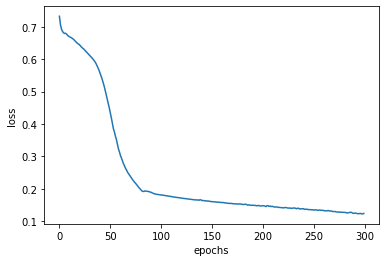

In [16]:
plt.plot(range(epochs), losses)
plt.xlabel('epochs')
plt.ylabel('loss')

In [17]:
with torch.no_grad():

    y_eval = my_model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [18]:
print(f'loss: {loss}')

loss: 0.26387670636177063


In [19]:
correct = 0
prediction = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_eval = my_model.forward(data)
        print(f'{i+1}. {str(y_eval)} predicted_y: {y_eval.argmax().item()} real_y: {y_test[i]}')
        
        prediction.append(y_eval.argmax().item())
        if y_eval.argmax().item() == y_test[i]:
            correct += 1
print(f'we got {correct} correct')

1. tensor([-1.0413,  4.3137]) predicted_y: 1 real_y: 1
2. tensor([0.7628, 2.3748]) predicted_y: 1 real_y: 1
3. tensor([-0.9594,  4.4249]) predicted_y: 1 real_y: 1
4. tensor([ 4.9696, -1.9116]) predicted_y: 0 real_y: 0
5. tensor([-2.8374,  7.0569]) predicted_y: 1 real_y: 1
6. tensor([-1.1339,  4.9737]) predicted_y: 1 real_y: 1
7. tensor([-2.2632,  5.2900]) predicted_y: 1 real_y: 1
8. tensor([ 7.4569, -1.6324]) predicted_y: 0 real_y: 0
9. tensor([-0.8093,  4.1839]) predicted_y: 1 real_y: 1
10. tensor([-2.4422,  6.0237]) predicted_y: 1 real_y: 1
11. tensor([2.2333, 0.8450]) predicted_y: 0 real_y: 0
12. tensor([-1.1915,  4.4087]) predicted_y: 1 real_y: 1
13. tensor([-0.4323,  3.2082]) predicted_y: 1 real_y: 1
14. tensor([-0.4801,  3.7923]) predicted_y: 1 real_y: 1
15. tensor([ 4.9129, -1.3440]) predicted_y: 0 real_y: 0
16. tensor([-1.2701,  3.7950]) predicted_y: 1 real_y: 1
17. tensor([-0.7468,  4.2652]) predicted_y: 1 real_y: 1
18. tensor([-2.3468,  5.7642]) predicted_y: 1 real_y: 1
19. t

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(confusion_matrix(y_test, prediction))

[[57  9]
 [ 9 96]]


In [26]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        66
           1       0.91      0.91      0.91       105

    accuracy                           0.89       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.89      0.89      0.89       171



In [27]:
torch.save(my_model.state_dict(), 'Cancer_prediction.pt')

In [32]:
new_data = torch.tensor([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]])

In [33]:
new_data

tensor([[1.7990e+01, 1.0380e+01, 1.2280e+02, 1.0010e+03, 1.1840e-01, 2.7760e-01,
         3.0010e-01, 1.4710e-01, 2.4190e-01, 7.8710e-02, 1.0950e+00, 9.0530e-01,
         8.5890e+00, 1.5340e+02, 6.3990e-03, 4.9040e-02, 5.3730e-02, 1.5870e-02,
         3.0030e-02, 6.1930e-03, 2.5380e+01, 1.7330e+01, 1.8460e+02, 2.0190e+03,
         1.6220e-01, 6.6560e-01, 7.1190e-01, 2.6540e-01, 4.6010e-01, 1.1890e-01]])

In [37]:
with torch.no_grad():
    prediction = my_model(new_data)

In [39]:
print(prediction)
print(prediction.argmax().item())

if prediction.argmax().item() == 0:
    print('you dont have cancer')
else:
    print('you have cancer')

tensor([[11.1081, -8.0304]])
0
you dont have cancer
